# Graduate Admission 

Nous allons étudier les facteurs qui déterminent l'admission d'un élève à un master en université américaine. 

Parmi ces facteurs, on compte : 

1. GRE Scores ( out of 340 ) 
2. TOEFL Scores ( out of 120 ) 
3. University Rating ( out of 5 ) 
4. Statement of Purpose and Letter of Recommendation Strength ( out of 5 ) 
5. Undergraduate GPA ( out of 10 ) 
6. Research Experience ( either 0 or 1 ) 
7. Chance of Admit ( ranging from 0 to 1 )

0. Importez les librairies usuelles

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


1. Importez le dataset et affichez le sous forme de DataFrame 

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [29]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


2. Notre variable est exprimée comme une probabilité. On voudrait que ce soit plutôt une classe. Remplacez donc toutes les probabilités supérieures à 75% par 1 et les autres par 0 

In [30]:
df['Chance of Admit '][df['Chance of Admit '] >= 0.75] = 1
df['Chance of Admit '][df['Chance of Admit '] < 0.75] = 0
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1.0
1,2,324,107,4,4.0,4.5,8.87,1,1.0
2,3,316,104,3,3.0,3.5,8.00,1,0.0
3,4,322,110,3,3.5,2.5,8.67,1,1.0
4,5,314,103,2,2.0,3.0,8.21,0,0.0


3. Regardez la répartition de GRE Score par rapport à l'admission 

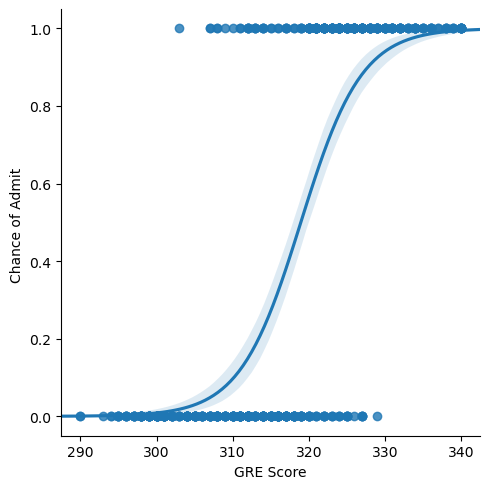

In [31]:
sns.lmplot(x="GRE Score", y="Chance of Admit ", data=df, logistic=True, truncate=False)

4. Faites de même avec le Toefl Score  / CGPA

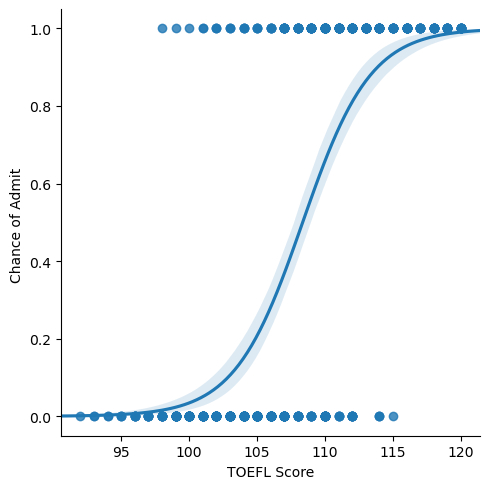

In [33]:
sns.lmplot(x="TOEFL Score", y="Chance of Admit ", data=df, logistic=True, truncate=False)

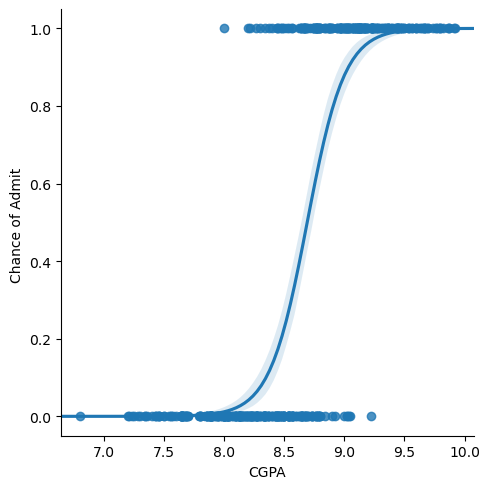

In [34]:
sns.lmplot(x="CGPA", y="Chance of Admit ", data=df, logistic=True, truncate=False)

5. Faites un barplot sur la colonne LOR / SOP / University Rating / Research

<AxesSubplot:xlabel='LOR ', ylabel='Chance of Admit '>

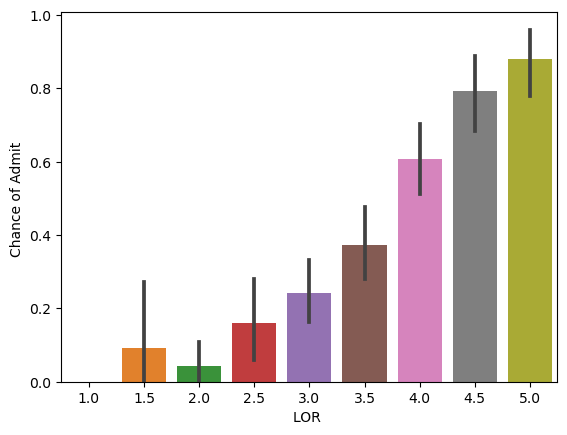

In [35]:
sns.barplot(x='LOR ',y='Chance of Admit ',data=df)

<AxesSubplot:xlabel='SOP', ylabel='Chance of Admit '>

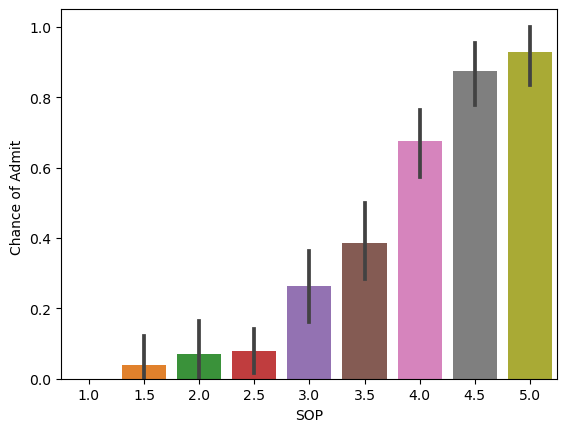

In [36]:
sns.barplot(x='SOP',y='Chance of Admit ',data=df)

<AxesSubplot:xlabel='University Rating', ylabel='Chance of Admit '>

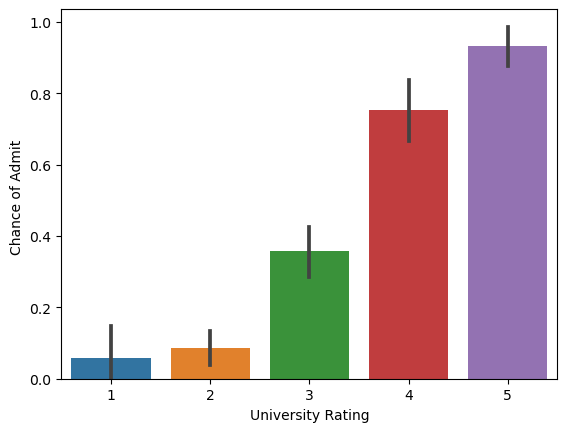

In [37]:
sns.barplot(x='University Rating',y='Chance of Admit ',data=df)

<AxesSubplot:xlabel='Research', ylabel='Chance of Admit '>

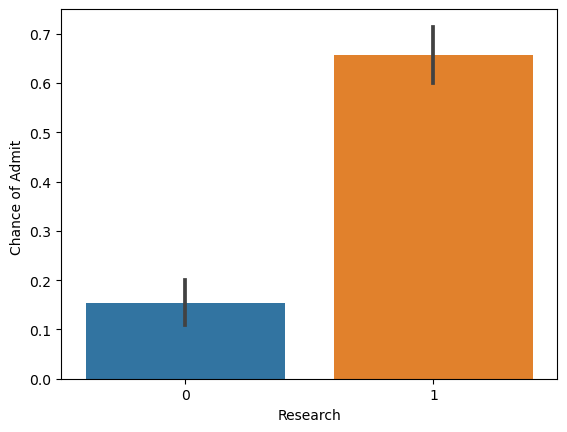

In [38]:
sns.barplot(x='Research',y='Chance of Admit ',data=df)

6. Séparez votre dataset en variables explicatives : ```X``` & variable cible : ```y``` 

In [39]:
X=df.drop('Chance of Admit ',axis=1)
y=df['Chance of Admit ']

7. Séparez votre dataset en données d'entrainement et de test 

In [40]:
from sklearn.model_selection import train_test_split


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

8. Tentez de faire un premier arbre de décision et évaluez votre score dans une matrice de confusion

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [42]:
from sklearn.metrics import accuracy_score , confusion_matrix

Y_train_pred = clf.predict(X_train)
Y_test_pred = clf.predict(X_test)
confusion_matrix(y_train,Y_train_pred)
print(accuracy_score(y_test , Y_test_pred))

0.82


9. Visualisez votre arbre via graphviz 

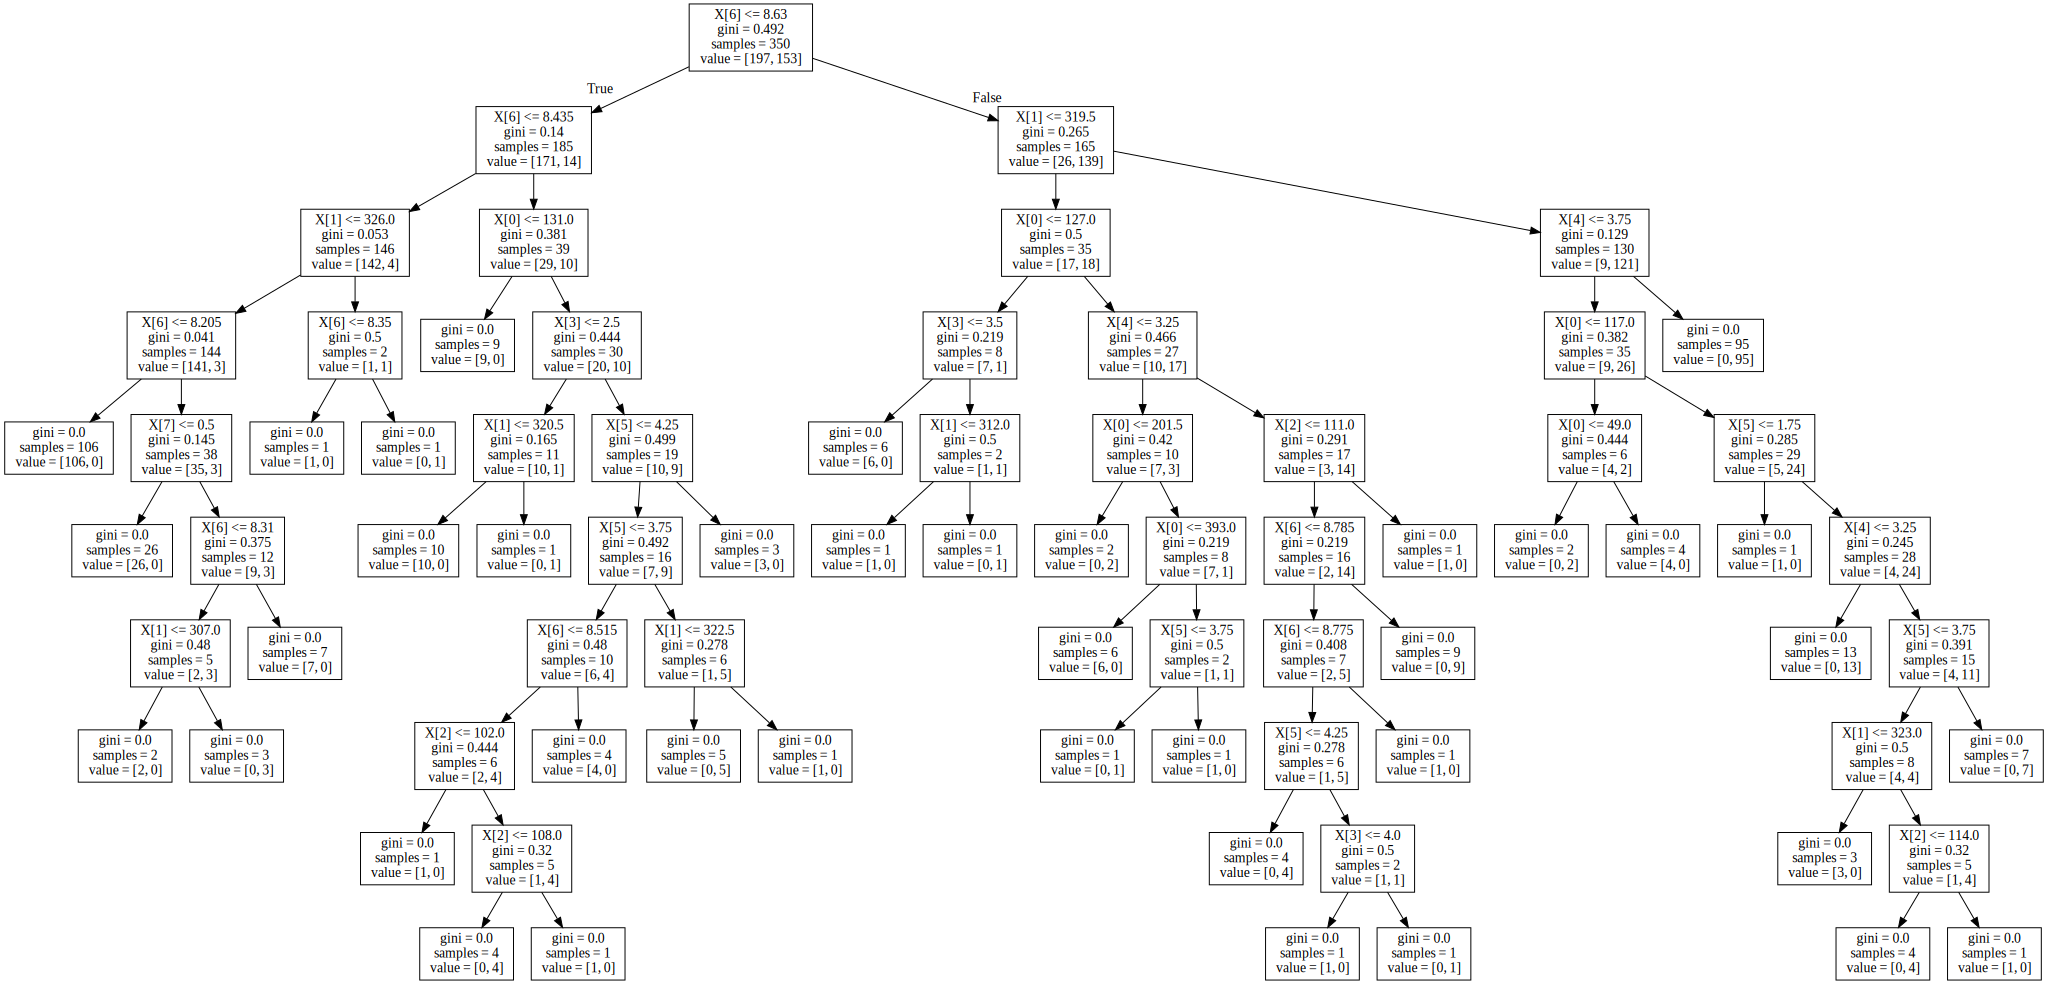

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='Balance',
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 


10. Classez les features les plus importantes qui déterminent les admissions 

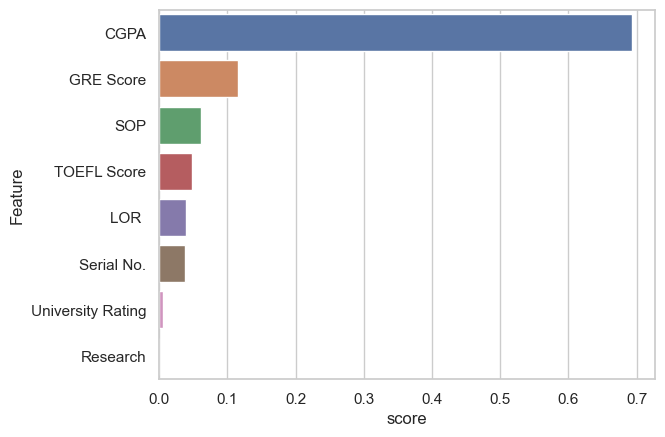

In [48]:
score= pd.Series(clf.feature_importances_, index=X.columns)
score_sorted = importances.sort_values(ascending=False)

# Plot feature importances
#sns.set_theme(style="whitegrid")
sns.barplot(x=importances_sorted, y=importances_sorted.index)
plt.xlabel('score')
plt.ylabel('Feature')
plt.show()

11. Essayons d'améliorer notre score. Faites une Random Forest avec 50 arbres de decision

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(n_estimators=50)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.87


12. Tentez de refaire le modèle avec uniquement 20 arbres 

In [51]:
clf = RandomForestClassifier(n_estimators=20)
clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.86


---> Il semblerait qu'il y ait un nombre optimum d'arbres.

13. Faites une Grid Search pour trouver le nombre optimum d'arbres 

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
# Define the parameter grid for the grid search
param_grid = {'n_estimators': [10, 20, 30, 40, 50]}

# Create a Random Forest classifier
rf = RandomForestClassifier()

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding accuracy score
print("Best parameters:", grid_search.best_params_)
y_pred = grid_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Best parameters: {'n_estimators': 40}
Accuracy: 0.86


14. Regardez les feature importance 

[['CGPA' '0.3559153264390205']
 ['GRE Score' '0.18117654320414994']
 ['TOEFL Score' '0.16023534463953193']
 ['University Rating' '0.0826396896013641']
 ['SOP' '0.07578062254817193']
 ['Serial No.' '0.07141029556534109']
 ['LOR ' '0.04952848902389309']
 ['Research' '0.023313688978527404']]


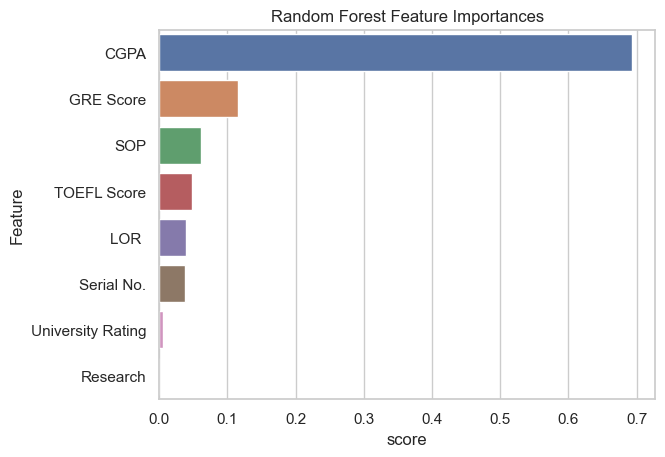

In [57]:
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X, y)

# Get the feature importances as a NumPy array
importances = rf.feature_importances_

# Print the feature rankings
feature_names = X.columns
sorted_indices = importances.argsort()[::-1] # sort descending
ranked_features = [(feature_names[i], importances[i]) for i in sorted_indices]
print(np.array(ranked_features))
sns.set_style("whitegrid")
sns.barplot(x=importances_sorted, y=importances_sorted.index)
plt.xlabel("score")
plt.ylabel("Feature")
plt.title("Random Forest Feature Importances")
plt.show()